In [12]:
from crow.cluster_modules.abundance import ClusterAbundance
import pyccl
import matplotlib.pyplot as plt
import numpy as np

## 1. Define a Cosmology and Halo Mass Function

We first need a cosmology object from `pyccl` to use in the cluster abundance calculations. Next, we define the halo mass function. PyCCL provides built-in HMFs such as Tinker et al. 2008.


In [10]:
# Example cosmology
cosmo = pyccl.Cosmology(
    Omega_c=0.25,
    Omega_b=0.05,
    h=0.67,
    sigma8=0.8,
    n_s=0.96,
    Neff=3.046,
)
# Example HMF
hmf = pyccl.halos.MassFuncTinker08(mass_def='200c')

## 2. Initialize the ClusterAbundance Object

We create the `ClusterAbundance` object with the cosmology and halo mass function.


In [14]:
cluster_abundance = ClusterAbundance(cosmo, hmf)

## 3. Compute the Comoving Volume and the mass function with a given cosmology

We can compute the differential comoving volume for a given redshift and sky area (in square degrees).


In [16]:
# Redshift array
z = np.linspace(0.1, 1.0, 10)
sky_area = 1000  # deg^2

dV = cluster_abundance.comoving_volume(z, sky_area)
print("Differential comoving volume [Mpc^3]:", dV)

log_mass = np.linspace(13, 15, 5)

# Compute mass function at each redshift
for zi in z:
    mf = cluster_abundance.mass_function(log_mass, np.full_like(log_mass, zi))
    print(f"Mass function at z={zi:.2f}:", mf)

Differential comoving volume [Mpc^3]: [2.48466900e+08 8.99015343e+08 1.82039279e+09 2.90151816e+09
 4.05444504e+09 5.21373727e+09 6.33370106e+09 7.38470870e+09
 8.34946752e+09 9.21969507e+09]
Mass function at z=0.10: [3.93707899e-04 1.19858761e-04 3.01730527e-05 5.06911369e-06
 3.55851559e-07]
Mass function at z=0.20: [3.92801756e-04 1.17015815e-04 2.82546185e-05 4.38559720e-06
 2.64129541e-07]
Mass function at z=0.30: [3.89322269e-04 1.13018989e-04 2.60045570e-05 3.68786043e-06
 1.86659538e-07]
Mass function at z=0.40: [3.82198981e-04 1.07666676e-04 2.34363743e-05 2.99733702e-06
 1.24367182e-07]
Mass function at z=0.50: [3.71796483e-04 1.01188951e-04 2.06917963e-05 2.35784237e-06
 7.84218913e-08]
Mass function at z=0.60: [3.58605947e-04 9.38949554e-05 1.79177462e-05 1.79877893e-06
 4.69697696e-08]
Mass function at z=0.70: [3.43223016e-04 8.60862209e-05 1.52247472e-05 1.33051965e-06
 2.66727292e-08]
Mass function at z=0.80: [3.26222002e-04 7.80206721e-05 1.26915157e-05 9.52726920e-07
 

## 4. Optional: Plot the Mass Function

Visualize the mass function as a function of halo mass for different redshifts.


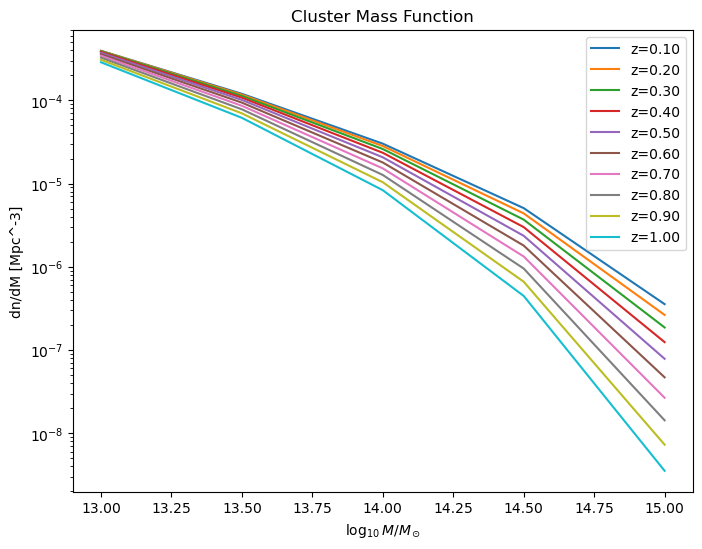

In [17]:
plt.figure(figsize=(8,6))
for zi in z:
    mf = cluster_abundance.mass_function(log_mass, np.full_like(log_mass, zi))
    plt.plot(log_mass, mf, label=f"z={zi:.2f}")

plt.yscale('log')
plt.xlabel(r'$\log_{10} M / M_\odot$')
plt.ylabel('dn/dM [Mpc^-3]')
plt.title('Cluster Mass Function')
plt.legend()
plt.show()
